# Trabajo práctico #2
## Integrantes:
Alex Rodriguez, 20250587    
Isabel Prado, 20250510   
Celeste Castañeda, 20250363  
Kevin Morales, 20250728   
Leonel Contreras, 20170129  

## Simulación de caminos aleatorios

Consideremos primero un simple paseo aleatorio que comienza en 0 con pasos de 1 y -1 que ocurren con igual probabilidad. 

- Codifique un recorrido (path) de 1.000 pasos utilizando un `bucle for` y luego utilizando `arreglos de datos` (o vectores).

- Calcule el valor máximo y mínimo alcanzado en el recorrido, el valor promedio y el desvío estándar. Además calcule cuantos pasos le llevó al proceso tener una distancia de 10 con respecto al valor inicial en cualquier dirección.

In [1]:
# definimos una funcion que, equiprobablemente, retorna 1 0 -1
# importamos random
import random
# definimos la funcion
def random_step():
    # generamos un numero aleatorio entre 0 y 1, si es menor a 0.5 retornamos 1; retornamos -1 en cualquier otro caso
    return 1 if random.random() < 0.5 else -1

In [8]:
# importamos array
import array
# importamos pyplot
import matplotlib.pyplot as plt
# importamos el modulo statistics
import statistics
# definimos la funcion que guarda todos los pasos en un array, definiendo asi el paseo aleatorio
# el parametro grafica hace que nuestra funcion despliegue o no el paseo aleatorio de manera grafica
# el parametro vectors indica que estructura de datos utilizar, si es 1 se usa un vector y un array en cualquier otro caso
# por default graficamos y utilizamos un array
def random_path(grafica=1, vectors=0):
    # dependiendo el parametro de la funcion, utilizamos una estructura de datos distinta 
    if vectors == 1:
        pasos = [0]  # lista (vector)
    else:
        pasos = array.array('i', [0])
    # esta variable indica el step en el que se llego a una distancia de 10 respecto al origen
    paso = 0
    # definimos un flag para cuando se halla llegado a una distancia de 10 respecto al origen
    alcanzado = False
    # iniciamos el ciclo for
    for i in range(1000):
        # generamos el nuevo paso
        step_value = random_step()
        # añadimos el paso a la estructura correspondiente
        if vectors == 1:
            pasos.append(pasos[-1] + step_value)
        else:
            pasos.append(pasos[-1] + step_value)
        # en el caso de array, debemos convertir a lista para acceder a los elementos de forma similar
        if vectors == 0:
            actual_paso = pasos[-1]
        else:
            actual_paso = pasos[-1]
        # definimos una variable que mide la distancia respecto al origen 
        distancia_actual = abs(actual_paso)
        # en el ciclo if, guardamos el paso hasta alcanzar la distancia requerrida
        if not alcanzado and distancia_actual >= 10:
            # guardamos el paso en que se alcanzó
            paso = i  
            # cambiamos el valor del flag
            alcanzado = True

    # calculamos media, desv est, max y min en el paseo
    # nos limitamos a dos decimales
    media = round(statistics.mean(pasos),2)
    stdev = round(statistics.stdev(pasos),2)
    maximo = round(max(pasos),2)
    minimo = round(min(pasos),2)
    
    if grafica==1:
        # ploteamos los pasos
        plt.plot(pasos)
        # ploteamos una vertical en el paso donde se alcanza la distancia de 10 respecto al origen
        plt.axvline(x=paso, color='black', linestyle='-', linewidth=1, label=f'Paso = {paso}')
        # graficamos la media
        plt.axhline(y=media, color='red', linestyle='--', linewidth=1, label=f'Media = {media}')
        # graficamos dos bandas a distancia de 10 respecto del origen para visualizar cuando se alcanza esta distancia
        plt.axhline(y=10, color='green', linestyle='-', linewidth=1)
        plt.axhline(y=-10, color='green', linestyle='-', linewidth=1)
        plt.xlabel('Número de pasos')
        plt.ylabel('Posición acumulada')
        plt.title('Camino Aleatorio')
        plt.show()
    # retornamos el array con la trayectoria y los datos estadisticos
    return pasos, media, stdev, maximo, minimo, paso
        

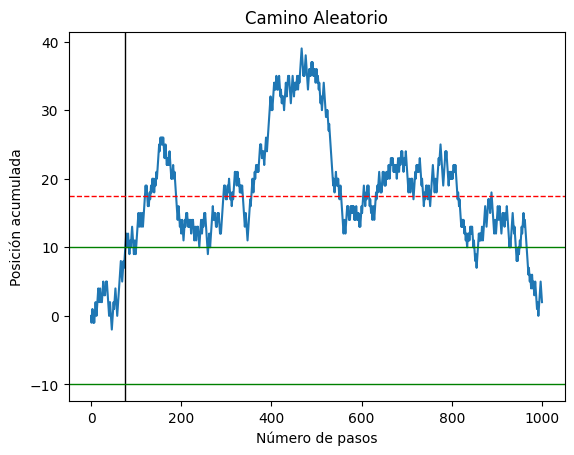

In [9]:
# corremos sin parametro la funcion para graficar por default
pasos, media, stdev, maximo, minimo, paso = random_path(grafica=1,vectors=1)

In [10]:
# imprimimos los return de la funcion
print(media, stdev, maximo, minimo, paso)

17.54 8.48 39 -2 75


In [11]:
# en este caso, la estructura utilizada es un vector, a.k.a, una lista
type(pasos)

list

In [12]:
# la funcion con parametro grafica=0 para no graficar 
p, m, s, maxi, mini, Paso = random_path(grafica=0,vectors=0)

In [13]:
# imprimimos los return de la funcion
print(m, s, maxi, mini, Paso)

13.69 11.87 35 -7 403


In [14]:
# en este caso la estructura utilizada es un array
type(p)

array.array